#Confidence Interval of Non-Parametric Statistical Tests

In [0]:
# methodology behind the code referenced from the British Medical Journal,
# volume 296, 21 May 1988:
# "Calculating confidence intervals for some non-parametric analyses" by 
# M J Campbell & M J Gardner
# https://www.ncbi.nlm.nih.gov/pmc/articles/PMC2545906/pdf/bmj00286-0037.pdf

# worked examples referenced from the book: 
# Statistics at Square One by M J Campbell & T D V Swinscow
# https://www.amazon.in/Statistics-Square-One-Michael-Campbell/dp/1405191007

In [0]:
# custom func for confidence interval for differences 
# for (non-Gaussian unpaired data). Example: Mann-Whitney U test

import numpy as np

def non_param_unpaired_CI(sample1, sample2, conf):
  n1 = len(sample1)  
  n2 = len(sample2)  
  alpha = 1-conf      
  N = stats.norm.ppf(1 - alpha/2) 

  # The confidence interval for the difference between the two population
  # medians is derived through the n x m differences.
  diffs = sorted([i-j for i in sample1 for j in sample2])
  
  # the Kth smallest to the Kth largest of the n x m differences then determine 
  # the confidence interval, where K is:
  k = np.math.ceil(n1*n2/2 - (N * (n1*n2*(n1+n2+1)/12)**0.5))
  
  CI = (round(diffs[k-1],3), round(diffs[len(diffs)-k],3))
  return CI

In [0]:
# custom func for confidence interval for differences 
# for (non-Gaussian paired data) Example: Wilcoxon signed-rank test

import numpy as np
import operator

def non_param_paired_CI(sample1, sample2, conf):
  n = len(sample1)  
  alpha = 1-conf      
  N = stats.norm.ppf(1 - alpha/2) 

  # The confidence interval for the difference between the two population
  # medians is derived through the n(n+1)/2 possible averaged differences.
  diff_sample = sorted(list(map(operator.sub, sample2, sample1)))
  averages = sorted([(s1+s2)/2 for i, s1 in enumerate(diff_sample) for _, s2 in enumerate(diff_sample[i:])])

  # the Kth smallest to the Kth largest of the averaged differences then 
  # determine the confidence interval, where K is:
  k = np.math.ceil(n*(n+1)/4 - (N * (n*(n+1)*(2*n+1)/24)**0.5))

  CI = (round(averages[k-1],3), round(averages[len(averages)-k],3))
  return CI

## Worked Examples

###Mann-Whitney *U* test 
###*for unpaired, non-normal continuous output data*

In [0]:
# A senior registrar in the rheumatology clinic of a district hospital
# has designed a clinical trial of a new drug for rheumatoid arthritis.
# Twenty patients were randomized into two groups of 10 to
# receive either the standard therapy A or a new treatment B. The
# plasma globulin fractions after treatment are listed in the Table below.

# Ques Posed : We wish to test whether the new treatment has changed the 
# plasma globulin (and we are worried about the assumption of Normality).

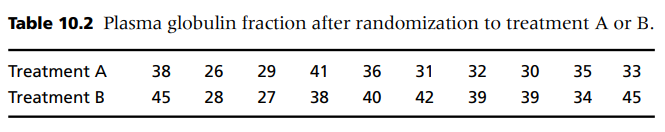

In [0]:
# H0 (null hypothesis): plasma globulin fraction is not affected by either treatments.

In [4]:
import numpy as np
from scipy import stats
import operator

# given
conf = 0.95
sample1 = [38,26,29,41,36,31,32,30,35,33]
sample2 = [45,28,27,38,40,42,39,39,34,45]

# mann-whitney
# we need to use alternative='two-sided'. The use_continuity param is set to 
# 'False' simply to compare with the findings of the book, 'Statistics at Square 
# One'. Otherwise, I think it can be left at its default value of 'True'.
stat, p = stats.mannwhitneyu(sample1, sample2, use_continuity=False, alternative='two-sided')
print(f"p: {round(p, 3)}")

if p<=(1-conf):
  print("Reject H0. Plasma globulin fraction looks likely to be affected by the treatments.")
else:
  print("Failed to reject H0. Plasma globulin fraction does not look likely to be affected by either treatments.")

# confidence interval
diff_median = np.median( list(map(operator.sub, sample1, sample2)) )
lower, upper = non_param_unpaired_CI(sample1, sample2, conf)

print(f"{100*conf} % confidence that the median of the samples' diff lies b/w {lower} and {upper}.")

p: 0.075
Failed to reject H0. Plasma globulin fraction does not look likely to be affected by either treatments.
95.0 % confidence that the median of the samples' diff lies b/w -10 and 1.


###Wilcoxon rank test (used for paired data)
###*for*
###*(a) Ordinal output data or* 
###*(b) Quantitative output data (discrete or non-normal)*

In [0]:
# Boogert et al. used ultrasound to record
# fetal movements before and after chorionic villus sampling. The
# percentage of time the fetus spent moving is given in the Table below
# for 10 pregnant women.

# Ques Posed : Does the chorionic villus sampling process change the 
# fetus movement time?

# If we are concerned that the differences in percentage of time
# spent moving are unlikely to be Normally distributed we could use
# the Wilcoxon signed rank test using the following assumptions:

In [0]:
# Assumptions:
# 1. The paired differences are independent.
# 2. The differences come from a symmetrical distribution.

# dataset :

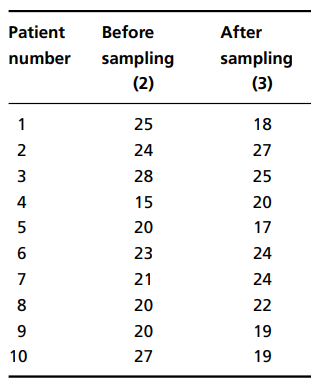

In [6]:
import numpy as np
from scipy import stats
import operator

# given
conf = 0.95
before = [25,24,28,15,20,23,21,20,20,27]
after = [18,27,25,20,17,24,24,22,19,19]

# wilcoxon
statistic, p = stats.wilcoxon(before, after)
print(f"p: {round(p,3)}")

if p<=(1-conf):
  print("Reject H0. The sampling process seems to change fetal movements.")
else:
  print("Failed to reject H0. The sampling process does not seem to change fetal movements.")

# confidence interval
diff_median = np.median( list(map(operator.sub, before, after)) )
lower, upper = non_param_paired_CI(before, after, conf)

print(f"{100*conf} % confidence that the median of the samples' diff lies b/w {lower} and {upper}.")

p: 0.681
Failed to reject H0. The sampling process does not seem to change fetal movements.
95.0 % confidence that the median of the samples' diff lies b/w -4.0 and 2.5.
